In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('./house_data_final.csv')
df

,Price,Area,No. of Bedrooms,Lift Available,Location_Airoli,Location_Ambernath East,Location_Andheri,Location_Andheri East,Location_Andheri West,Location_Badlapur East,...,Location_Vasai West,Location_Vasai east,Location_Vashi,Location_Ville Parle East,Location_Virar,Location_Virar East,Location_Virar West,Location_Wadala,Location_Wadala East Wadala,Location_mumbai
0,48.5,720,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,45.0,600,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,650,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.0,650,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,50.0,665,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,26.0,530,1,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4001,72.0,995,2,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4002,70.0,1020,2,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4003,145.0,900,2,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
from sklearn.linear_model import ElasticNet,Lasso,LinearRegression,Ridge
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [4]:
X = df.drop('Price' , axis=1)
y = df['Price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1,2],
            }
        },
        'ElasticNet': {
            'model': ElasticNet(),
            'params': {
                'alpha':[0.1,1,5],
                'l1_ratio':[.1, .5, .7,]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.846622,{}
1,ridge,0.845907,{'alpha': 1}
2,ElasticNet,0.688606,"{'alpha': 0.1, 'l1_ratio': 0.7}"


<mark>Based on result of GridSearchCV linear regression is a good choice</mark>

<h3><mark>testing the model</mark></h3>

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_predict = model.predict(X_test)

In [9]:
residual = y_test-y_predict

<h3><mark>residual plotting</mark></h3>

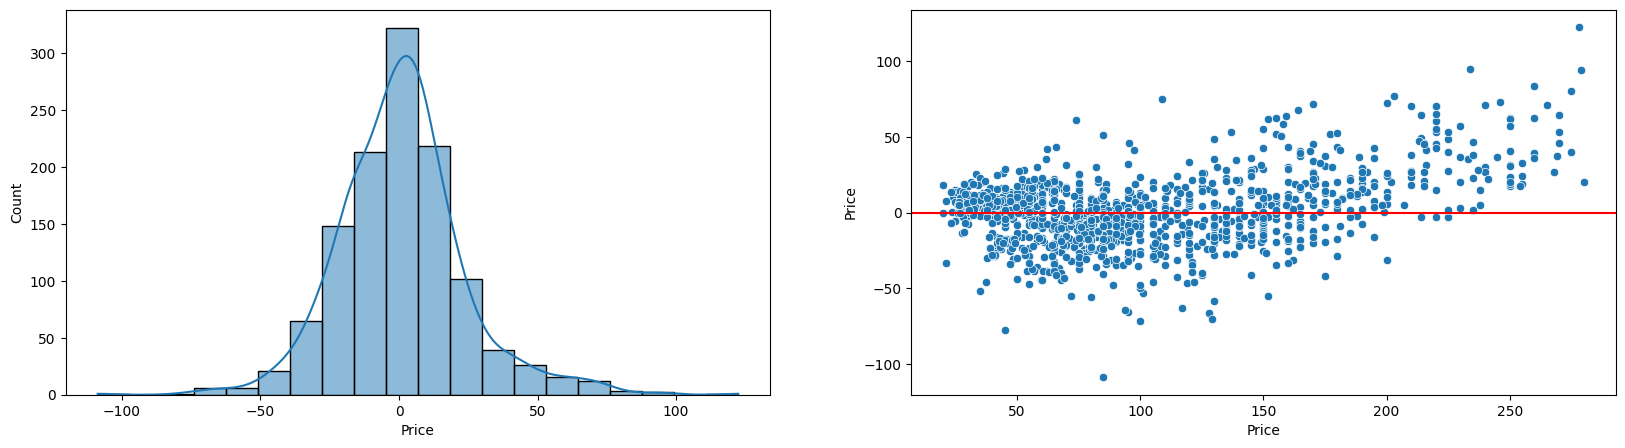

In [10]:
fig, axes = plt.subplots(1, 2 , figsize=(20,5))
sns.histplot(residual , kde=True , ax=axes[0] , bins=20)
sns.scatterplot(x=y_test , y=residual , ax=axes[1])
axes[1].axhline(y=0, color='r')

<h2>Mean Error</h2>

In [28]:
np.mean(np.abs(residual))

16.76863389571255

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
def predict_price(Area,Bedrooms,Lift, location):    
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = Bedrooms
    x[2] = Lift
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

<h3><mark>Final test</mark></h3>

In [14]:
X.columns

Index(['Area', 'No. of Bedrooms', 'Lift Available', 'Location_Airoli',
       'Location_Ambernath East', 'Location_Andheri', 'Location_Andheri East',
       'Location_Andheri West', 'Location_Badlapur East',
       'Location_Bandra East', 'Location_Belapur', 'Location_Bhandup West',
       'Location_Bhayandar East', 'Location_Bhiwandi', 'Location_Boisar',
       'Location_Borivali East', 'Location_Borivali West', 'Location_Chembur',
       'Location_Chembur East', 'Location_Dahisar', 'Location_Dahisar East',
       'Location_Dahisar West', 'Location_Dattapada', 'Location_Dombivali',
       'Location_Dombivali East', 'Location_Dombivli (West)',
       'Location_Dronagiri', 'Location_Ghansoli', 'Location_Ghatkopar',
       'Location_Ghatkopar West', 'Location_Goregaon',
       'Location_Goregaon East', 'Location_Goregaon West',
       'Location_Jogeshwari West', 'Location_Juhu', 'Location_Kalwa',
       'Location_Kalyan East', 'Location_Kalyan West', 'Location_Kamothe',
       'Location_

In [24]:
predict_price(Area=400, Bedrooms=1, Lift=0, location='Location_Ambernath East')

C:\Users\SAMI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


12.635682074168223

<mark>Reasobaly accurate result compared to pricing on housing sites</mark>